In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [2]:
data = {
    'customer_id': ['C001','C002','C003','C004','C005','C006','C007','C008','C009','C010'],
    'annual_spend': [1200,3500,800,2200,5000,1500,4200,950,3000,600],
    'purchase_frequency': [12,24,6,18,30,10,28,8,20,5],
    'avg_basket_value': [100,145,90,122,167,110,150,95,140,85],
    'website_visits': [25,40,15,30,55,20,48,18,35,12]
}

df = pd.DataFrame(data)
df


,customer_id,annual_spend,purchase_frequency,avg_basket_value,website_visits
0,C001,1200,12,100,25
1,C002,3500,24,145,40
2,C003,800,6,90,15
3,C004,2200,18,122,30
4,C005,5000,30,167,55
5,C006,1500,10,110,20
6,C007,4200,28,150,48
7,C008,950,8,95,18
8,C009,3000,20,140,35
9,C010,600,5,85,12


In [3]:
X = df[['annual_spend', 'purchase_frequency', 'avg_basket_value', 'website_visits']]


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

df


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,customer_id,annual_spend,purchase_frequency,avg_basket_value,website_visits,cluster
0,C001,1200,12,100,25,2
1,C002,3500,24,145,40,1
2,C003,800,6,90,15,2
3,C004,2200,18,122,30,0
4,C005,5000,30,167,55,1
5,C006,1500,10,110,20,2
6,C007,4200,28,150,48,1
7,C008,950,8,95,18,2
8,C009,3000,20,140,35,0
9,C010,600,5,85,12,2


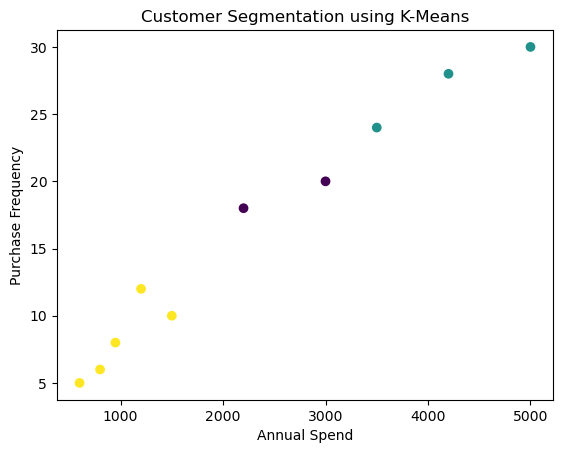

In [6]:
plt.scatter(
    df['annual_spend'],
    df['purchase_frequency'],
    c=df['cluster'],
    cmap='viridis'
)
plt.xlabel("Annual Spend")
plt.ylabel("Purchase Frequency")
plt.title("Customer Segmentation using K-Means")
plt.show()
